# Modelo Preditivo para Marketing Digital

## Introdução
Este projeto tem como objetivo criar um modelo preditivo para prever o valor gasto pelo usuário, além de antecipar o retorno de uma campanha e otimizar as estratégias de marketing utilizando os dados reais do Google Merchandising Store.

## Objetivo
Este projeto tem como objetivo aplicar Machine Learning no Marketing Digital, entender os conceitos de dados de comportamento online e criar variáveis de usuários em sites.

## Bibliotecas

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Carregando os dados

In [2]:
df = pd.read_csv('Dados/train.csv')
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


## Análise exploratória

### Verificando o tamanho do dataframe

In [3]:
print(f'Dataframe contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

Dataframe contém 12283 linhas e 12 colunas.


### Verificando os tipos de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  int64 
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  uint64
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(4), object(7), uint64(1)
memory usage: 1.1+ MB


### Verificando a quantidade de usuários únicos

In [5]:
print(f'Quantidade de usuários únicos: {len(df["fullVisitorId"].unique())}')

Quantidade de usuários únicos: 9996


### Tratando o tipo das colunas

In [6]:
df = pd.read_csv('Dados/train.csv', dtype={'date': object,'fullVisitorId': object, 'VisitId': object})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channelGrouping       12283 non-null  object
 1   date                  12283 non-null  object
 2   device                12283 non-null  object
 3   fullVisitorId         12283 non-null  object
 4   geoNetwork            12283 non-null  object
 5   sessionId             12283 non-null  object
 6   socialEngagementType  12283 non-null  object
 7   totals                12283 non-null  object
 8   trafficSource         12283 non-null  object
 9   visitId               12283 non-null  int64 
 10  visitNumber           12283 non-null  int64 
 11  visitStartTime        12283 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


### Transformando os valores em coluna do dataframe

In [7]:
# Criando dicionarios com as colunas que contém dados em formato json
dicionarios = ['device', 'geoNetwork', 'totals', 'trafficSource']

# Criando novas colunas no dataframe com os dados em formato json
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


### Excluindo as colunas

In [8]:
df.drop(dicionarios, axis=1, inplace=True)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [9]:
# Excluindo coluna adwordsClickInfo.
df.drop('adwordsClickInfo', axis=1, inplace=True)

## Limpeza dos dados

### Verificando os valores únicos de cada coluna

Podemos notar que algumas colunas possuem somente 1 valor único. Essas colunas não trazem nenhuma informação valiosa para nosso conjunto de dados, sendo assim, criamos um código que verifica se a coluna possui somente 1 valor único para excluirmos essa coluna.

In [10]:
for coluna in df.columns:
    print(f'{coluna}: {len(df[coluna].unique())}')

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2


In [11]:
# Lista de colunas com apenas um valor único
coluna_na = []

# Verificando colunas com apenas um valor único.
for coluna in df.columns:
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)

# Excluindo colunas com apenas um valor único.
df.drop(coluna_na, axis=1, inplace=True)

df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [12]:
print(f'Dataframe contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

Dataframe contém 12283 linhas e 31 colunas.


### Corrigindo variáveis quantitativas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   channelGrouping     12283 non-null  object
 1   date                12283 non-null  object
 2   fullVisitorId       12283 non-null  object
 3   sessionId           12283 non-null  object
 4   visitId             12283 non-null  int64 
 5   visitNumber         12283 non-null  int64 
 6   visitStartTime      12283 non-null  int64 
 7   browser             12283 non-null  object
 8   operatingSystem     12283 non-null  object
 9   isMobile            12283 non-null  bool  
 10  deviceCategory      12283 non-null  object
 11  continent           12283 non-null  object
 12  subContinent        12283 non-null  object
 13  country             12283 non-null  object
 14  region              12283 non-null  object
 15  metro               12283 non-null  object
 16  city                12

In [14]:
var_quantitativas = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

for coluna in var_quantitativas:
    df[coluna] = pd.to_numeric(df[coluna])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  object 
 1   date                12283 non-null  object 
 2   fullVisitorId       12283 non-null  object 
 3   sessionId           12283 non-null  object 
 4   visitId             12283 non-null  int64  
 5   visitNumber         12283 non-null  int64  
 6   visitStartTime      12283 non-null  int64  
 7   browser             12283 non-null  object 
 8   operatingSystem     12283 non-null  object 
 9   isMobile            12283 non-null  bool   
 10  deviceCategory      12283 non-null  object 
 11  continent           12283 non-null  object 
 12  subContinent        12283 non-null  object 
 13  country             12283 non-null  object 
 14  region              12283 non-null  object 
 15  metro               12283 non-null  object 
 16  city

### Tratando variável resposta

A quantidade de linhas com dados nulos na coluna de resposta transactionRevenue serão substituídas por valor 0, pois trata-se de usuários que não realizou compra. Ainda, realizamos uma multiplicação para voltar esse valor para o formato real.

In [15]:
# Verificando valores nulos da coluna transactionRevenue.
df['transactionRevenue'].isna().sum()

12119

In [16]:
# Preenchendo valores nulos da coluna transactionRevenue com 0.
df['transactionRevenue'].fillna(0, inplace=True)

In [17]:
df['transactionRevenue'] = df['transactionRevenue'] / 1000000
df['transactionRevenue'].value_counts()

transactionRevenue
0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: count, Length: 147, dtype: int64

### Criando nova dataframe com quantidade de acessos por usuário

Sabendo que a quantidade de visitas na página é maior do que a quantidade de usuários, agrupamos os dados por id de usuário para mostrar os dados de cada usuário.

In [18]:
df_quant = df.groupby('fullVisitorId', as_index=False)[var_quantitativas].sum()

df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [19]:
print(f'Dataframe contém {df_quant.shape[0]} linhas e {df_quant.shape[1]} colunas.')

Dataframe contém 9997 linhas e 6 colunas.


## Criação do modelo

### Separando os dados de feature e target

In [20]:
X = df_quant.drop('transactionRevenue', axis=1)
y = df_quant['transactionRevenue'].copy()

### Separando os dados de treino e teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Criando o modelo de regressão linear

In [22]:
# Instanciando o modelo.
modelo_lr = LinearRegression()

# Treinando o modelo.
modelo_lr.fit(X_train, y_train)

# Fazendo previsões.
y_pred = modelo_lr.predict(X_test)

### Comparando os resultados

Para avaliar os resultados, criamos um data frame para visualizar melhor. Podemos notar que o modelo não está realizando predições de forma eficiente.

In [23]:
resultados = pd.DataFrame()

# O que foi gasto de fato.
resultados['revenue'] = y_test

# Previsão de gastos.
resultados['revenue_predict'] = y_pred

# Erro da previsão.
resultados['erro'] = y_pred - y_test

resultados.head()

,revenue,revenue_predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


Para avaliar a performance do modelo utilizamos a raiz do erro médio quadrático e gráficos.

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np

print(np.sqrt(mean_squared_error(y_test, y_pred)))

28.412073660366516


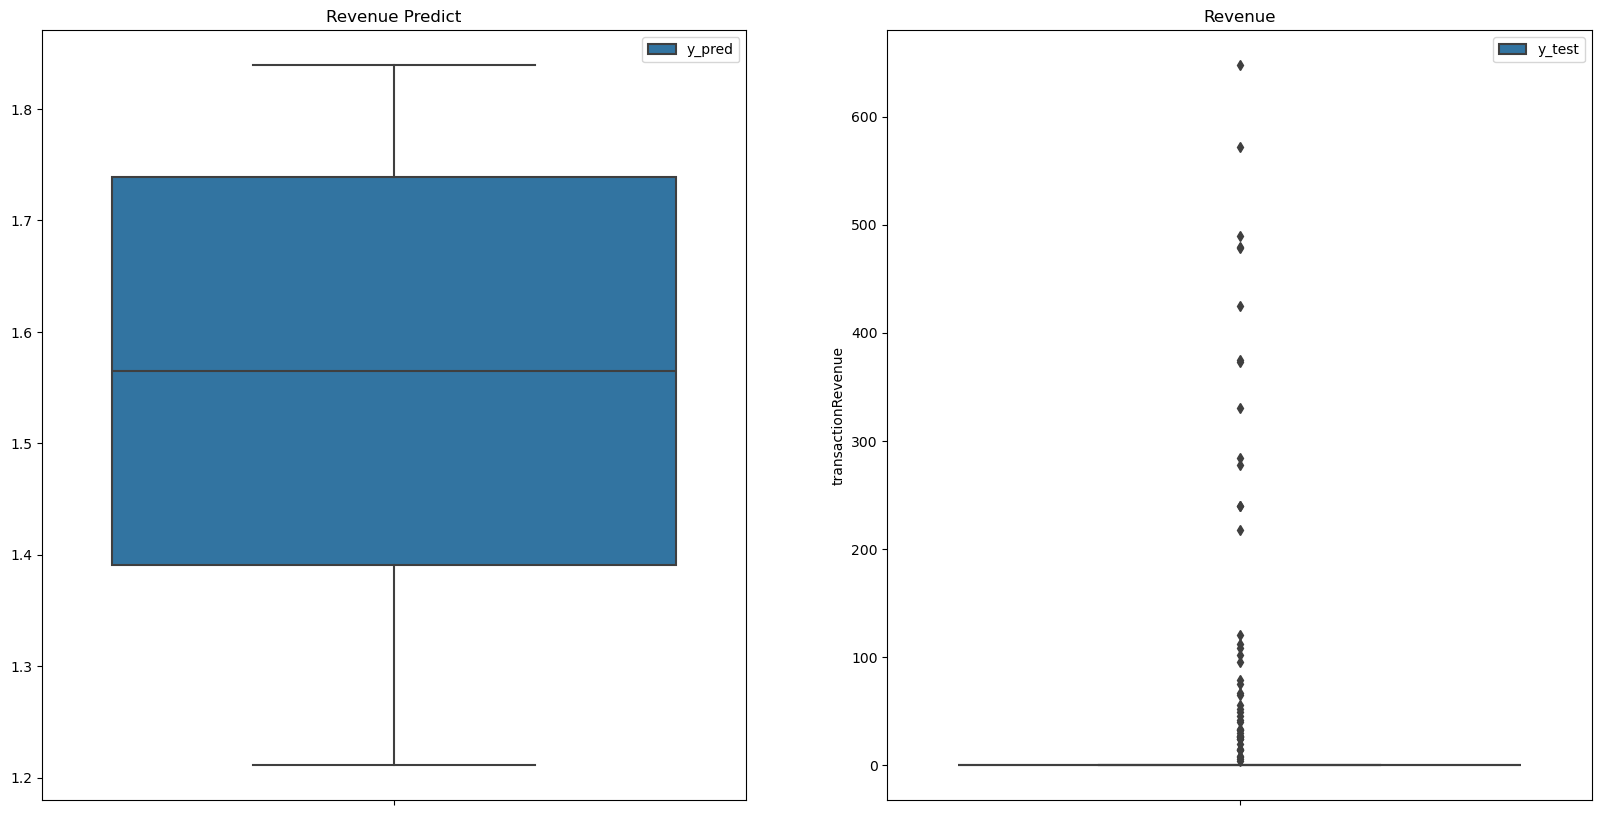

In [25]:
# Criando os gráficos.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(y=y_test, ax=ax[1]).set_title('Revenue')
sns.boxplot(y=y_pred, ax=ax[0]).set_title('Revenue Predict')

ax[1].legend(['y_test'])
ax[0].legend(['y_pred'])

plt.show()

Ao comparar os dois gráficos notamos uma grande concentração no zero e vários outliers nas previsões realizadas. O modelo está errando mais do que o desvio natural da base.